In [19]:
import pandas as pd
import numpy as np
import seaborn as seaborn

In [20]:
df=pd.read_csv("C:/Users/rajpu/OneDrive/Desktop/b/attainment.csv")
df

,Year,Sex,Min degree,Total,White,Black,Hispanic,Asian,Pacific Islander,American Indian/Alaska Native,Two or more races
0,1920,A,high school,?,22.0,6.3,?,?,?,?,?
1,1940,A,high school,38.1,41.2,12.3,?,?,?,?,?
2,1950,A,high school,52.8,56.3,23.6,?,?,?,?,?
3,1960,A,high school,60.7,63.7,38.6,?,?,?,?,?
4,1970,A,high school,75.4,77.8,58.4,?,?,?,?,?
...,...,...,...,...,...,...,...,...,...,...,...
209,2014,F,master's,9.3,11.1,5.0,3.6,20.8,?,?,7.5
210,2015,F,master's,10.4,12.0,7.2,4.1,23.2,?,?,10.2
211,2016,F,master's,11.2,12.3,6.3,6.3,28.8,?,?,8.2
212,2017,F,master's,10.5,11.8,6.8,5,25.8,?,?,5.4


QUESTION 1

In [21]:
df.head(5)

,Year,Sex,Min degree,Total,White,Black,Hispanic,Asian,Pacific Islander,American Indian/Alaska Native,Two or more races
0,1920,A,high school,?,22.0,6.3,?,?,?,?,?
1,1940,A,high school,38.1,41.2,12.3,?,?,?,?,?
2,1950,A,high school,52.8,56.3,23.6,?,?,?,?,?
3,1960,A,high school,60.7,63.7,38.6,?,?,?,?,?
4,1970,A,high school,75.4,77.8,58.4,?,?,?,?,?


In [22]:
df.replace("?", pd.NA ,inplace=True)
a=df.isnull().any(axis=1).sum()
print("total number of rows with missing values:", a)

total number of rows with missing values: 125


In [23]:
a=df[df["Sex"].isin(["F","M"])&(df["Min degree"]=="high school")&(df["Year"]==1980)]
b=a[["Sex","Total"]]
b

,Sex,Total
78,M,85.4
146,F,85.5


<Axes: xlabel='Black', ylabel='White'>

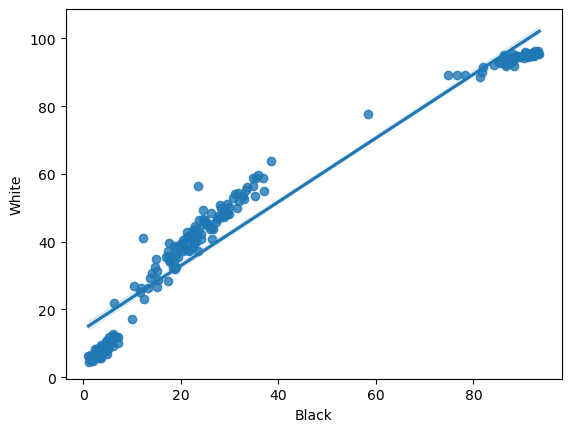

In [24]:
seaborn.regplot(data=df,x="Black",y="White")

QUESTION2

In [25]:
f=df.isnull().sum()
print("Missing Values in individual column\n",f,"\n\nTotal misssing values\n",sum(f))

Missing Values in individual column
 Year                               0
Sex                                0
Min degree                         0
Total                              2
White                              0
Black                              0
Hispanic                          10
Asian                             46
Pacific Islander                 121
American Indian/Alaska Native     83
Two or more races                 57
dtype: int64 

Total misssing values
 319


In [26]:
df.replace("?", pd.NA ,inplace=True)
df

C:\Users\rajpu\anaconda3\Lib\site-packages\pandas\core\missing.py:95: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  new_mask = arr == x


AttributeError: 'bool' object has no attribute 'to_numpy'

QUESTION 3

In [29]:
g=df.fillna(df.mean(numeric_only=True))
g

,Year,Sex,Min degree,Total,White,Black,Hispanic,Asian,Pacific Islander,American Indian/Alaska Native,Two or more races
0,1920,A,high school,<NA>,22.0,6.3,<NA>,<NA>,<NA>,<NA>,<NA>
1,1940,A,high school,38.1,41.2,12.3,<NA>,<NA>,<NA>,<NA>,<NA>
2,1950,A,high school,52.8,56.3,23.6,<NA>,<NA>,<NA>,<NA>,<NA>
3,1960,A,high school,60.7,63.7,38.6,<NA>,<NA>,<NA>,<NA>,<NA>
4,1970,A,high school,75.4,77.8,58.4,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...
209,2014,F,master's,9.3,11.1,5.0,3.6,20.8,<NA>,<NA>,7.5
210,2015,F,master's,10.4,12.0,7.2,4.1,23.2,<NA>,<NA>,10.2
211,2016,F,master's,11.2,12.3,6.3,6.3,28.8,<NA>,<NA>,8.2
212,2017,F,master's,10.5,11.8,6.8,5,25.8,<NA>,<NA>,5.4


QUESTION 4

In [30]:
def minDistance( word1: str, word2: str) -> int:
        #matrix= list of size of length of word1(no. of columns=i) in loop for lenght of word2(number of rows=j)
        
        matrix= [[float("inf")]*(len(word1)+1) for i in range(len(word2)+1)]
        
        #filling base values by
        for i in range(len(word2)+1):
            matrix[i][len(word1)]= len(word2)-i
        for j in range(len(word1)+1):
            matrix[len(word1)+1][j]= len(word1)-j
            
        #filling rest
        for i in range(len(word2)-1,-1,-1):
            for j in range(len(word1)-1,-1,-1):
                if word1[j]==word2[i]:
                    matrix[i][j]=matrix[i+1][j+1]
                else:
                    matrix[i][j]=1+min(matrix[i][j+1],matrix[i+1][j],matrix[i+1][j+1])
        return matrix[0][0]
word1 = "Asian"
word2 = "Indian"
distance = minDistance(word1 , word2)
print(f"Edit distance between '{word1}' and '{word2}' is {distance}")

word1 = "Min degree"
word2 = "Max degrees"
distance = minDistance(word1, word2)
print(f"Edit distance between '{word1}' and '{word2}' is {distance}")


Edit distance between 'Asian' and 'Indian' is 3
Edit distance between 'Min degree' and 'Max degrees' is 3


In [41]:
n=df['Sex'].replace({'A': 0, 'F': 2, 'M': 1}, inplace=True)
n=df['Min degree'].replace({'high school': 1,"associate's":2, "bachelor's":3,"master's":0}, inplace=True)
n= df[['Sex', 'Min degree']]
n

,Sex,Min degree
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
209,2,0
210,2,0
211,2,0
212,2,0


QUESTION 5

In [27]:
award=df[(df["Year"]>=2010)&(df["Year"]<=2010)&(df["Sex"]=="A")].iloc[:,4:10].mean().nlargest(2)
award= pd.DataFrame(award).transpose()
award['White_Black'] = award.sum(axis=1)
award

C:\Users\rajpu\AppData\Local\Temp\ipykernel_21700\3865963339.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  award=df[(df["Year"]>=2010)&(df["Year"]<=2010)&(df["Sex"]=="A")].iloc[:,4:10].mean().nlargest(2)


,White,Black,White_Black
0,47.425,35.775,83.2


In [40]:
Bennettemail="e22cseu0365@bennett.edu.in"
Part1,Part2=Bennettemail.split("@")
print("Part1: {} \nPart2: {} ".format(Part1,Part2))

Part1: e22cseu0365 
Part2: bennett.edu.in 
